# Udacity Data Analyst Nanodegree

## P2:Investigate a Dataset

#### Author: Bolong Xiong
#### Date: July 11, 2017

# Dataset information
The Dataset is [Titanic data](https://www.kaggle.com/c/titanic/data) from Kaggle. The data has been split into two groups:training set and test set. The training dataset contains passenger information from 891 of 2224 passengers. In this project, we only use training set to investigate Titanic dataset.

The Titanic Dataset contain ten variables, here is the data dictionary:
<img src='捕获.png'>


# Data Wrangling

## import python packages

In [106]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## import Titanic Data
We start by acquiring the datasets into Pandas DataFrames.

In [107]:
titanic_data = pd.read_csv('titanic-data.csv')

In [108]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [110]:
titanic_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In the last five data of this dataset, we can find that there are some values for Age, Cabin are NaN and values for Ticket are alphanumeric with missing value. 

In [111]:
#drop unwanted columns
titanic_data_new= titanic_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

For the convenience of analysis, I drop unwanted columns and only keep Survived, Pclass, Sex, Age, SibSp and parch these fivefeatures.

In [112]:
titanic_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [113]:
#missing values analysis
titanic_data_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We can find that there are 177 values in Age and 2 values in port of embarkation are missing. Here are missing values.

In [114]:
missing_age_value = pd.isnull(titanic_data_new['Age'])
titanic_data_new[missing_value].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


In [115]:
missing_embarked_value = pd.isnull(titanic_data_new['Embarked'])
titanic_data_new[missing_embarked_value]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [116]:
# Determine number of males and females in missing age values
missing_age_female = titanic_data_new[missing_value]['Sex'] == 'female'
missing_age_male = titanic_data_new[missing_value]['Sex'] == 'male'
missing_survived = titanic_data_new[missing_value]['Survived']==1
missing_dead = titanic_data_new[missing_value]['Survived']== 0
print('Number for females is {} '.format(missing_age_female.sum()))
print('Number for males is {} '.format(missing_age_male.sum()))
print('Number for survived passengers is {} '.format(missing_survived.sum()))
print('Number for dead passengers is {} '.format(missing_dead.sum()))

Number for females is 53 
Number for males is 124 
Number for survived passengers is 52 
Number for dead passengers is 125 


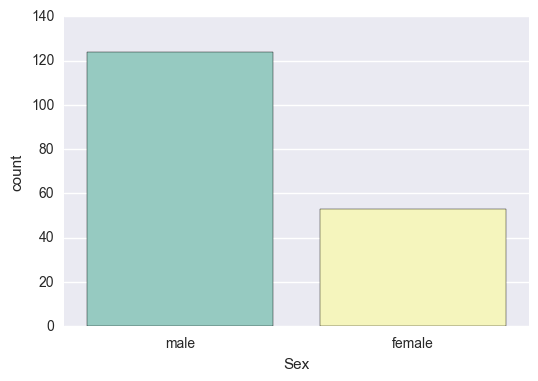

In [117]:
missing_sex_count=sns.countplot(x='Sex',data=titanic_data_new[missing_value],palette="Set3")

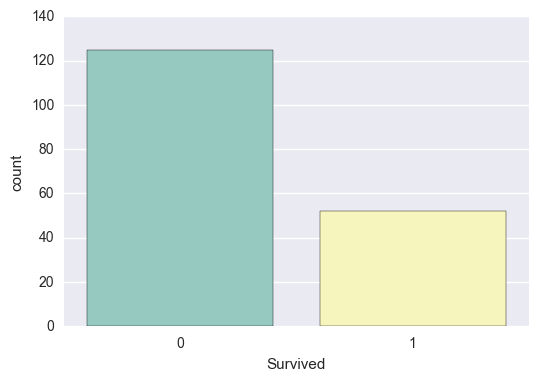

In [118]:
sns.countplot(x='Survived',data=titanic_data_new[missing_value],palette="Set3")

From these graphs, we can find that the most missing data are not survived males. The total missing data in age is up to 177 which occupied nearly 20% of total data.

In [119]:
titanic_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [120]:
titanic_data_new.describe()

E:\software\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can find that the Survived rate is 38%. The mean age of passengers is near thirty. The  youngest passenger in the Titanic is less than 1 year old and the oldest passenger is eighty year old.

# Data Exploration

## 1. Survival Analysis in different Pclass

The passengers are divided into three different class. Will passenger class is a factor in survival rate?

In [121]:
#calculate survival rate of male and female in different Pclass
def survival_rate(pclass, sex):
    grouped = titanic_data_new.groupby(['Pclass', 'Sex']).size()[pclass,sex]
    grouped_data = titanic_data_new.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex]
    survived_rate = (grouped_data / grouped * 100).round(2)  
    return survived_rate

In [160]:
print ('The female survival rate in Pclass 1 is: {}%'.format(survival_rate(1,'female')))
print ('The male survival rate in Pclass 1 is {} %'.format(survival_rate(1,'male')))
print ('The female survival rate in Pclass 2 is: {}%'.format(survival_rate(2,'female')))
print ('The male survival rate in Pclass 2 is: {}%'.format(survival_rate(2,'male')))
print ('The female survival rate in Pclass 3 is: {}%'.format(survival_rate(3,'female')))
print ('The male survival rate in Pclass 3 is: {}%'.format(survival_rate(3,'male')))

The female survival rate in Pclass 1 is: 96.81%
The male survival rate in Pclass 1 is 36.89 %
The female survival rate in Pclass 2 is: 92.11%
The male survival rate in Pclass 2 is: 15.74%
The female survival rate in Pclass 3 is: 50.0%
The male survival rate in Pclass 3 is: 13.54%


In [159]:
def survival_rate_Pclass(pclass):
    grouped = titanic_data_new.groupby(['Pclass']).size()[pclass]
    grouped_data = titanic_data_new.groupby(['Pclass','Survived']).size()[pclass,1]
    survived_rate = (grouped_data / grouped * 100).round(2)  
    return survived_rate

In [162]:
print ('The survival rate in Pclass 1 is: {}%'.format(survival_rate_Pclass(1)))
print ('The survival rate in Pclass 2 is {} %'.format(survival_rate_Pclass(2)))
print ('The survival rate in Pclass 3 is: {}%'.format(survival_rate_Pclass(3)))

The survival rate in Pclass 1 is: 62.96%
The survival rate in Pclass 2 is 47.28 %
The survival rate in Pclass 3 is: 24.24%


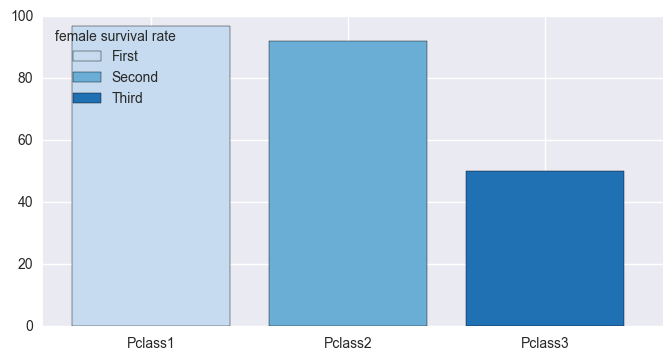

In [166]:
#Female survival rate in different Pclass
plot_pclass=[1,2,3]
female_survival_rate=[96.81,92.11,50]
male_survival_rate=[36.89,15.74,13.54]
Pclass_survival_rate=[62.96,47.28,24.24]
sns.set_context(rc={"figure.figsize": (8, 4)})
nd = np.arange(3)
width=0.8
plt.xticks(nd+width/2., ('Pclass1','Pclass2','Pclass3'))
plt.xlim(-0.15,3)
fig1 = plt.bar(nd, female_survival_rate, color=sns.color_palette("Blues",3))
plt.legend(fig1, ['First','Second','Third'], loc = "upper left", title = "female survival rate")
plt.show()

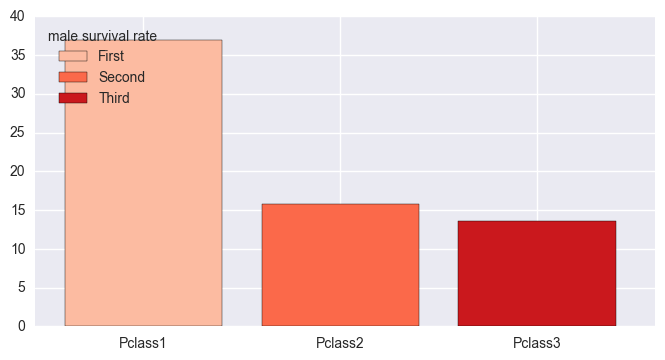

In [169]:
#Male survival rate in different Pclass
plt.xticks(nd+width/2., ('Pclass1','Pclass2','Pclass3'))
plt.xlim(-0.15,3)
fig2 = plt.bar(nd, male_survival_rate, color=sns.color_palette("Reds",3))
plt.legend(fig2, ['First','Second','Third'], loc = "upper left", title = "male survival rate")
plt.show()

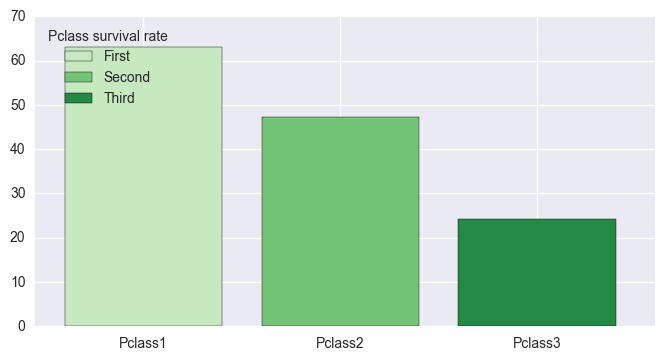

In [173]:
#Survival rate in different Pclass
plt.xticks(nd+width/2., ('Pclass1','Pclass2','Pclass3'))
plt.xlim(-0.15,3)
fig3 = plt.bar(nd, Pclass_survival_rate, color=sns.color_palette("Greens",3))
plt.legend(fig3,['First','Second','Third'], loc = "upper left", title = "Pclass survival rate")
plt.show()

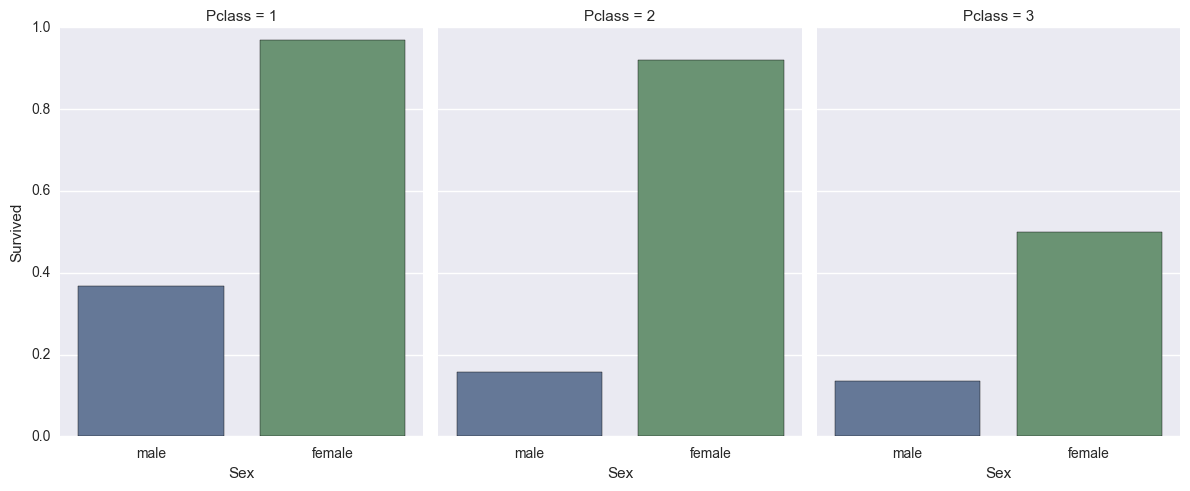

In [158]:
g = sns.factorplot(x='Sex', y='Survived', col='Pclass', data=titanic_data_new, saturation=0.5, kind="bar", ci=None, size=5, aspect=0.8)

Based on these analysis, we can find that Class 3 has the lowest survival rate and class 1 has the highest survival rate. **A passenger in Class 1 is around 2.6 times more likely to survive than a passenger in Class3.** Taken sex into consideration, female survive more than male in all different classes especially in Class 2. A female passenger in Class 2 is **6 times **more likelt to survive than a male passenger in Class 2.

## 2. Survival Analysis in Parch and Sib Sp

Did passengers with siblings or parents onboard have a better survival rate than others? 

**SibSp**

In [174]:
titanic_data_new[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Parch**

In [192]:
titanic_data_new[["Parch","Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


From above tables, we can find that if a passenger is alone without any siblings, he only has **34.54%** survival rate and a passenger withou any parents has only **34.37%** survival rate. That makes sense. If a passenger has family on board, he will try to save their life instead of escaping by himself.

## 3.Survival Analysis in Age

Will age of passenger influence survival rate? We can anlysis the survival rate of different age range.

E:\software\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


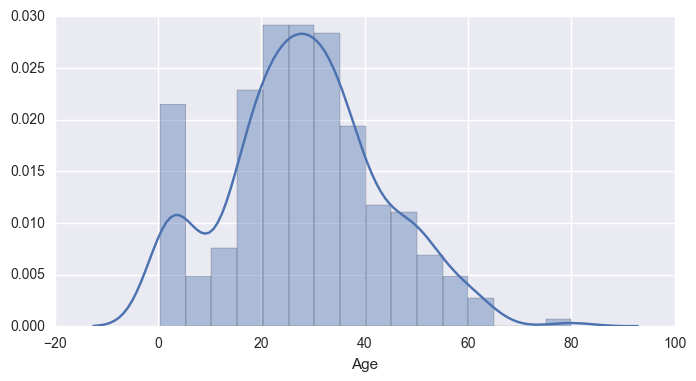

In [228]:
#drop Nan data in Age
drop_missing_age = titanic_data_new.dropna(subset=['Age'])
survival_with_drop = drop_missing_age[drop_missing_age['Survived']==1]
dead_with_drop = drop_missing_age[drop_missing_age['Survived']==0]
sns.distplot(survival_with_drop['Age'])

E:\software\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


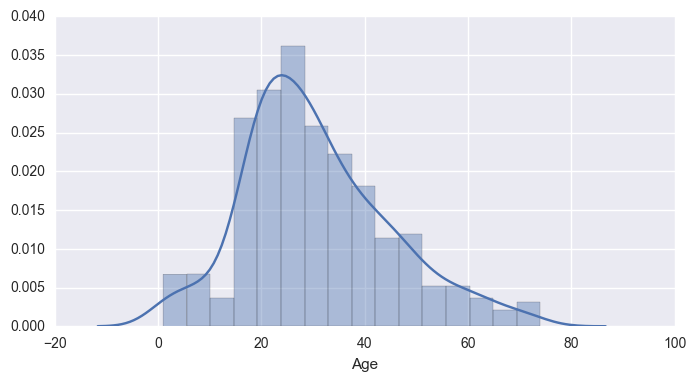

In [246]:
sns.distplot(dead_with_drop['Age'])

E:\software\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


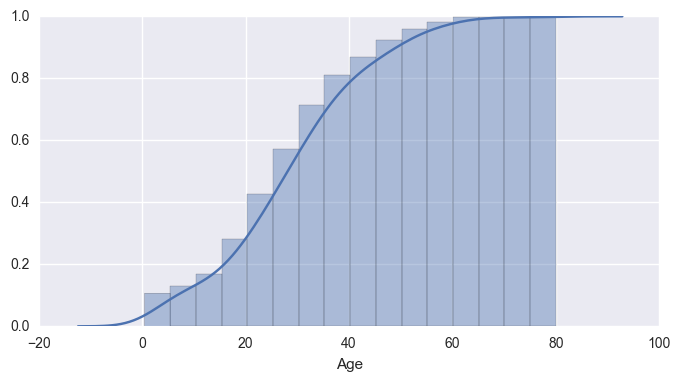

In [240]:
sns.distplot(survival_with_drop['Age'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))

In [248]:
#Divide Age into different groups
titanic_data_new['Age_Range'] = pd.cut(titanic_data_new['Age'],4) 
titanic_data_new[['Age_Range','Survived']].groupby(['Age_Range'], as_index=False).mean().sort_values(by='Age_Range', ascending=True)

,Age_Range,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.397403
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80]",0.227273


Above graphs tell us that most survived passenger are between 20-40 year old. I divide passenger into 4 groups. The people less than 20 year old has the highest survival rate. The older the less survival rate. The lowest survival rate is between 60 - 80 year old people.

# References
[Kaggle:Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data) <br>
[seaborn:Plotting with categorical data](http://seaborn.pydata.org/tutorial/categorical.html)<br>
[seaborn:seaborn.factorplot](http://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot) <br>
[Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)